In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train=pd.read_csv(r"train.csv")

In [7]:
test=pd.read_csv(r"test.csv")

In [8]:
dataset=train.append(test)

In [9]:
dataset=dataset.drop("employee_id",axis=1)

In [10]:
dataset

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [11]:
dataset["is_promoted"].value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

In [12]:
dataset.shape

(78298, 13)

In [13]:
dataset["is_promoted"].value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

# 1. Handle missing values

In [14]:
dataset.isnull().any()

department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted              True
dtype: bool

In [15]:
dataset["age"].fillna(dataset["age"].mean(),inplace=True)

dataset["previous_year_rating"].fillna(dataset["previous_year_rating"].mean(),inplace=True)

In [16]:
dataset["is_promoted"].isnull().any()

True

In [17]:
dataset.isnull().any()

department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted              True
dtype: bool

In [18]:
dataset["is_promoted"].fillna(dataset["is_promoted"].mode()[0],inplace=True)

In [19]:
#dataset["is_promoted"]=dataset["is_promoted"].clip

In [20]:
dataset['education'].fillna(dataset['education'].mode()[0],inplace=True)


In [21]:
dataset.shape

(78298, 13)

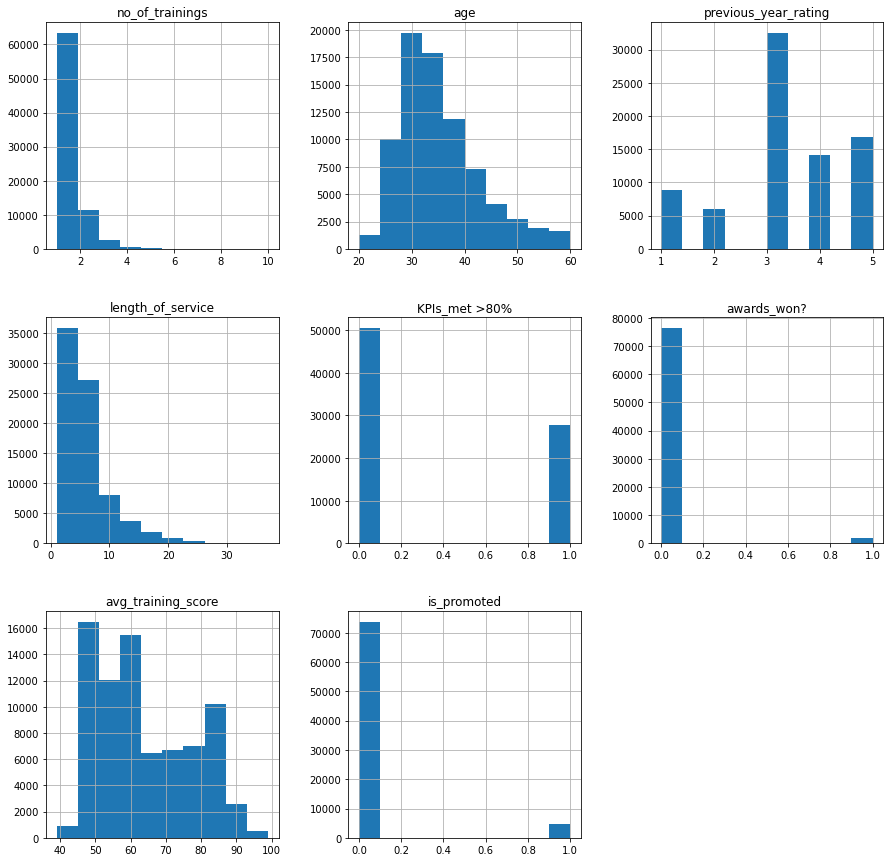

In [22]:
dataset.hist(figsize=(15,15))
plt.show()

In [23]:
dataset["education"].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

# Divide data into numerical and categorical

In [24]:
cat_data=[]

In [25]:
for col in dataset.columns:
    if (dataset[col].dtypes=="object") or (dataset[col].nunique()<10):
        cat_data.append(col)

In [26]:
dataset_cat=dataset[cat_data]

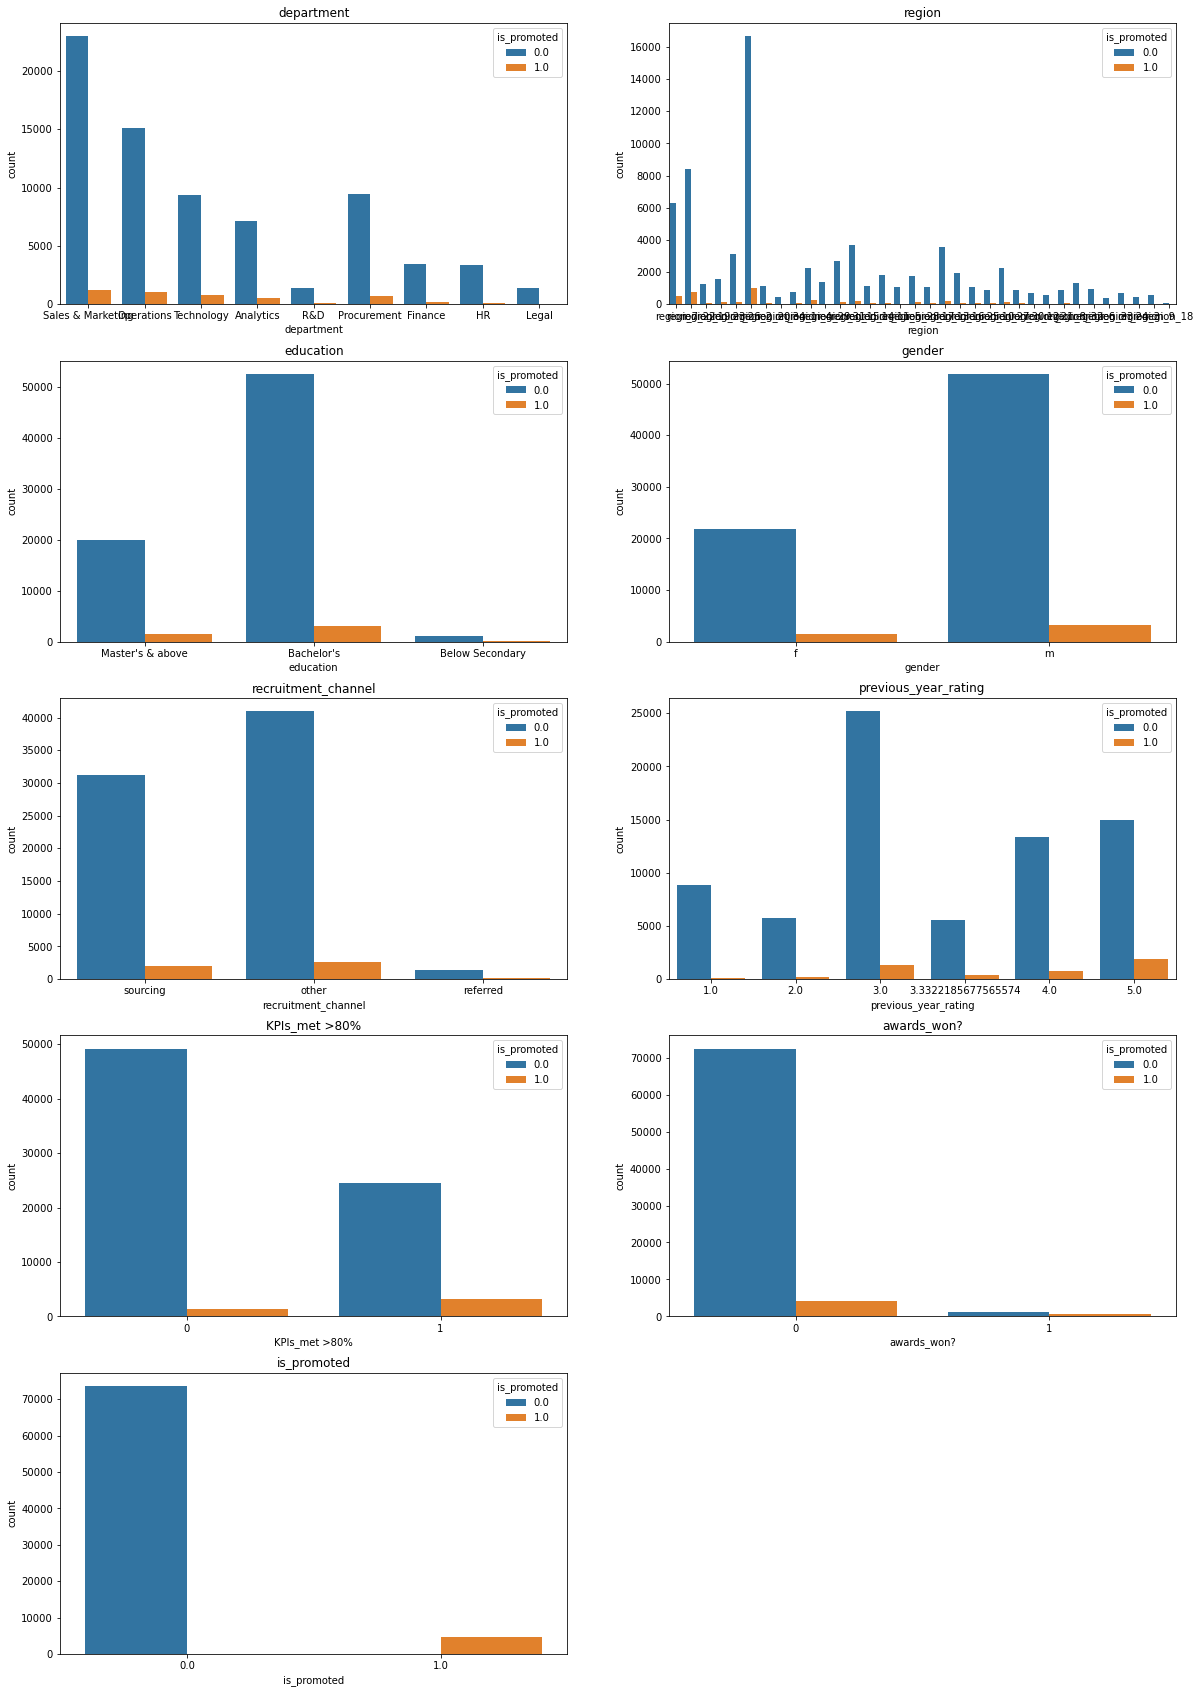

In [27]:
plt.figure(figsize=(20,30))
for i,col in enumerate(dataset_cat.columns,1):
    plt.subplot(5,2,i)
    sns.countplot(dataset_cat[col],hue=dataset["is_promoted"])
    plt.title(col)
    

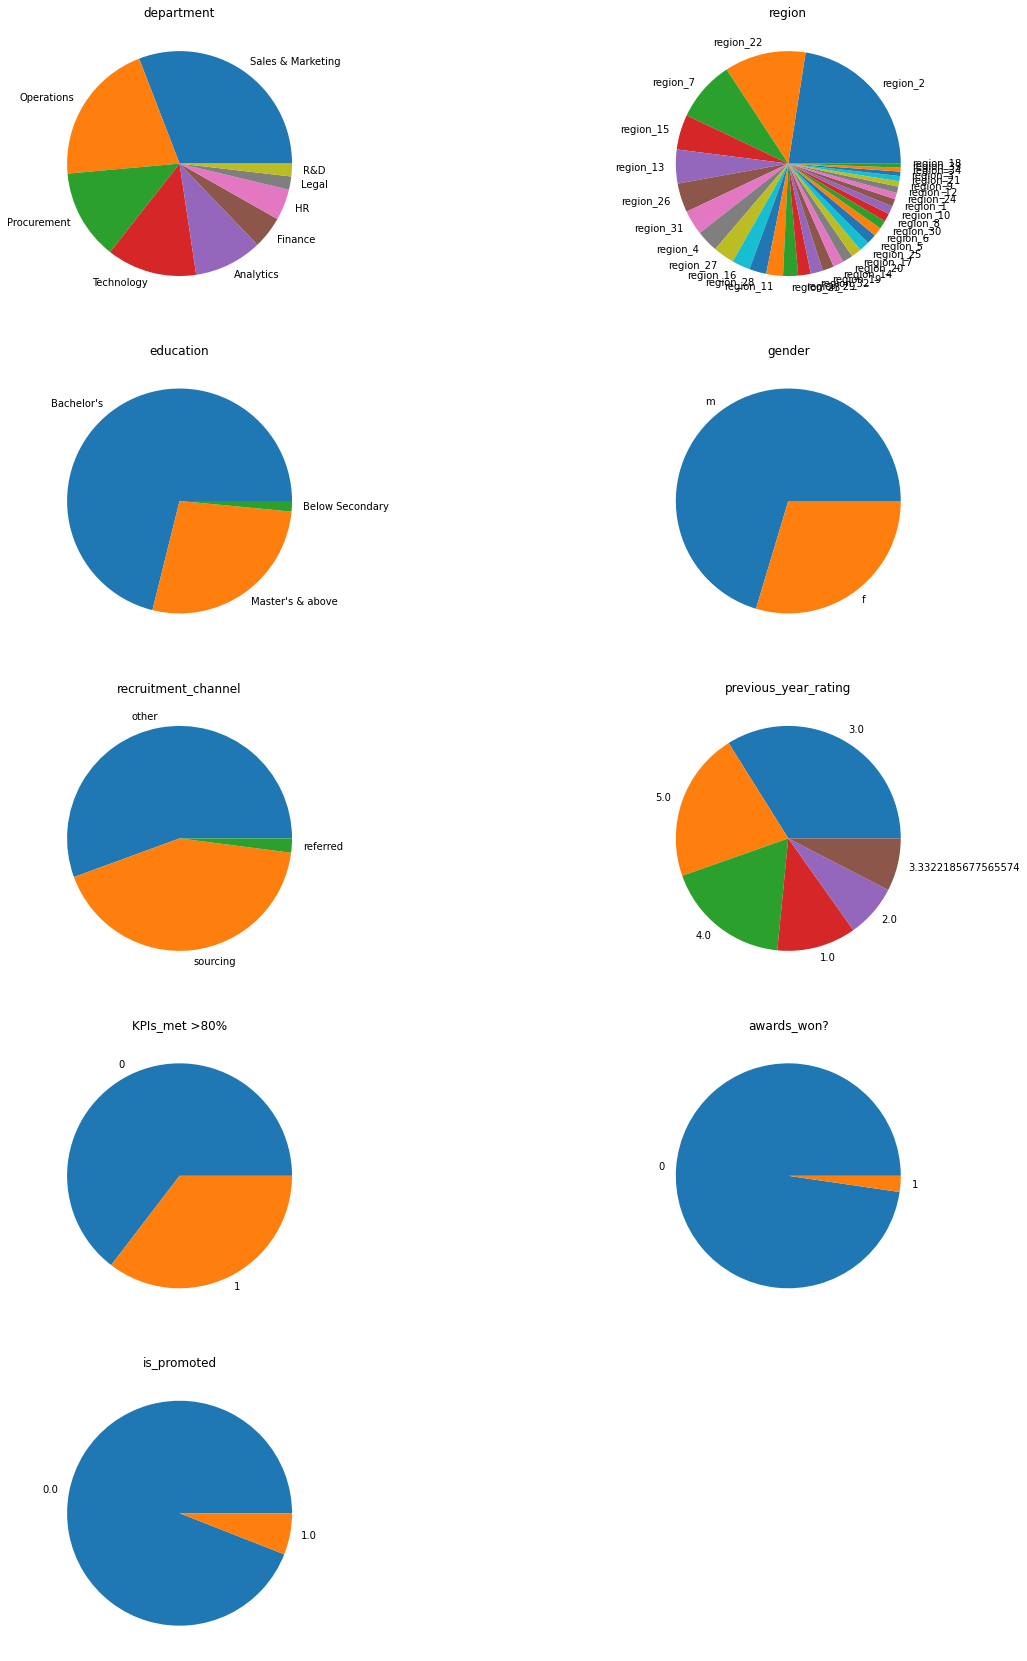

In [28]:
plt.figure(figsize=(20,30))
for i,col in enumerate(dataset_cat.columns,1):
    plt.subplot(5,2,i)
    plt.pie(dataset_cat[col].value_counts().values,labels=dataset_cat[col].value_counts().index)
    plt.title(col)


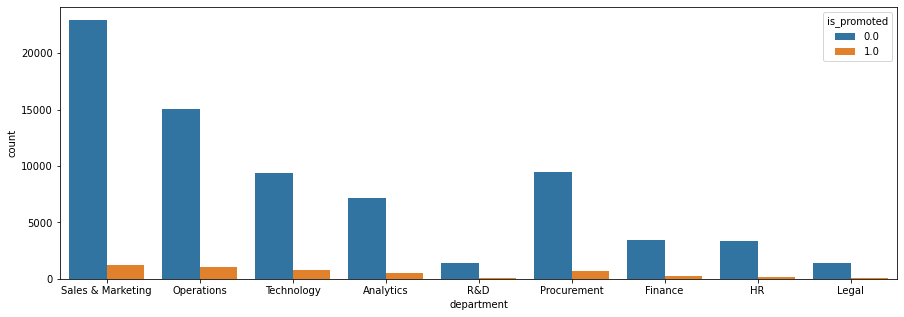

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(dataset['department'],hue=dataset['is_promoted'])

In [30]:
for col in dataset_cat.columns:
    print("==================="+col+"=======================")
    display(pd.crosstab(dataset_cat[col],dataset["is_promoted"]))

===================department=======================


is_promoted,0.0,1.0
department,,
Analytics,7159,512
Finance,3421,206
HR,3367,136
Legal,1431,53
Operations,15089,1023
Procurement,9470,688
R&D,1370,69
Sales & Marketing,22942,1213
Technology,9381,768


===================region=======================


is_promoted,0.0,1.0
region,,
region_1,790,58
region_10,866,51
region_11,1812,74
region_12,682,33
region_13,3585,230
region_14,1115,62
region_15,3716,222
region_16,1953,102
region_17,1048,109


===================education=======================


is_promoted,0.0,1.0
education,,
Bachelor's,52560,3130
Below Secondary,1112,67
Master's & above,19958,1471


===================gender=======================


is_promoted,0.0,1.0
gender,,
f,21739,1467
m,51891,3201


===================recruitment_channel=======================


is_promoted,0.0,1.0
recruitment_channel,,
other,40968,2556
referred,1455,138
sourcing,31207,1974


===================previous_year_rating=======================


is_promoted,0.0,1.0
previous_year_rating,,
1.000000,8815,88
2.000000,5775,181
3.000000,25184,1355
3.332219,5597,339
4.000000,13342,784
5.000000,14917,1921


===================KPIs_met >80%=======================


is_promoted,0.0,1.0
KPIs_met >80%,,
0,49172,1406
1,24458,3262


===================awards_won?=======================


is_promoted,0.0,1.0
awards_won?,,
0,72384,4109
1,1246,559


===================is_promoted=======================


is_promoted,0.0,1.0
is_promoted,,
0.0,73630,0
1.0,0,4668


In [31]:
num_data=[]

In [32]:
for col in dataset.columns:
    if (dataset[col].dtypes!="object") and (dataset[col].nunique()>=10):
        num_data.append(col)

In [33]:
dataset_num=dataset[num_data]

In [34]:
dataset_num

,no_of_trainings,age,length_of_service,avg_training_score
0,1,35,8,49
1,1,30,4,60
2,1,34,7,50
3,2,39,10,50
4,1,45,2,73
...,...,...,...,...
23485,1,24,1,61
23486,1,31,7,74
23487,1,26,4,50
23488,3,27,1,70


C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


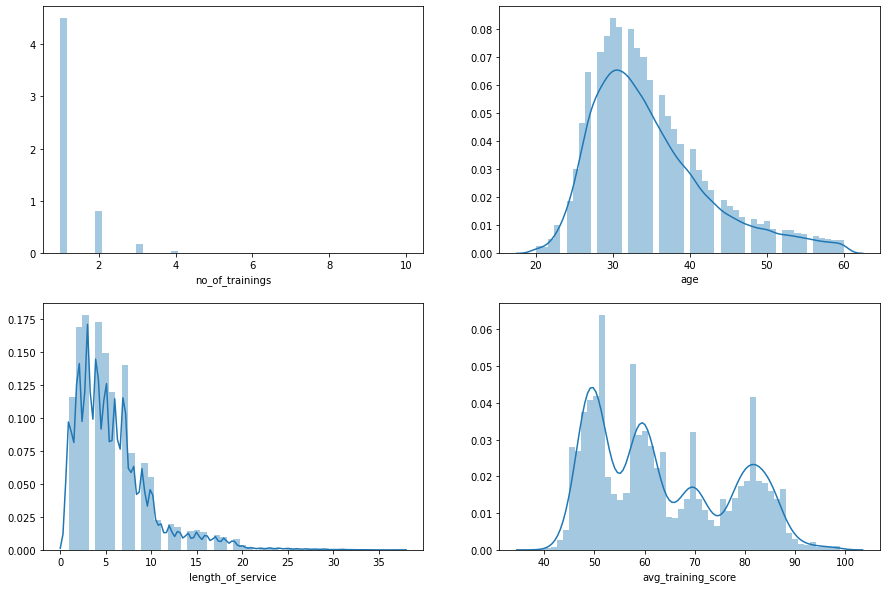

In [35]:
plt.figure(figsize=(15,10))
for i,col in enumerate(dataset_num.columns,1):
    plt.subplot(2,2,i)
    sns.distplot(dataset_num[col])

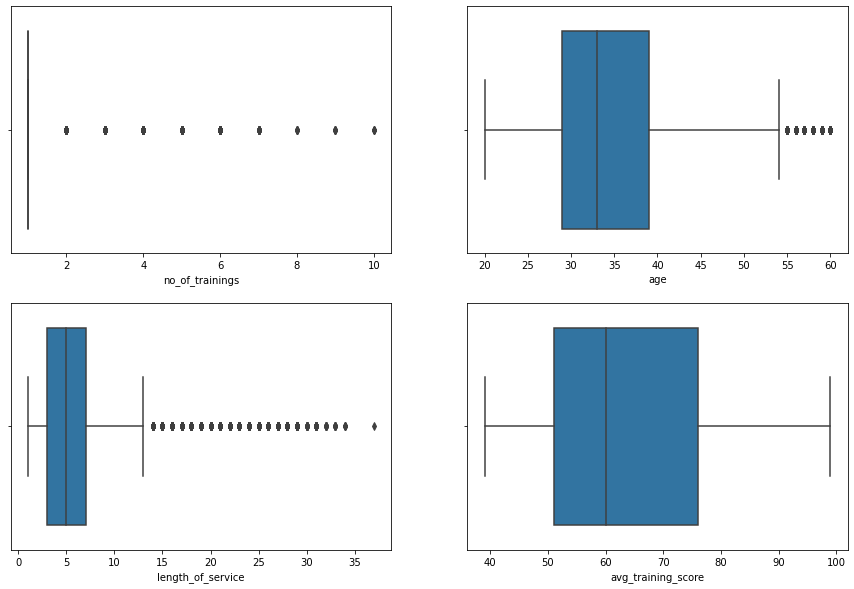

In [36]:
plt.figure(figsize=(15,10))
for i,col in enumerate(dataset_num.columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(dataset_num[col],hue=dataset['is_promoted'])
  


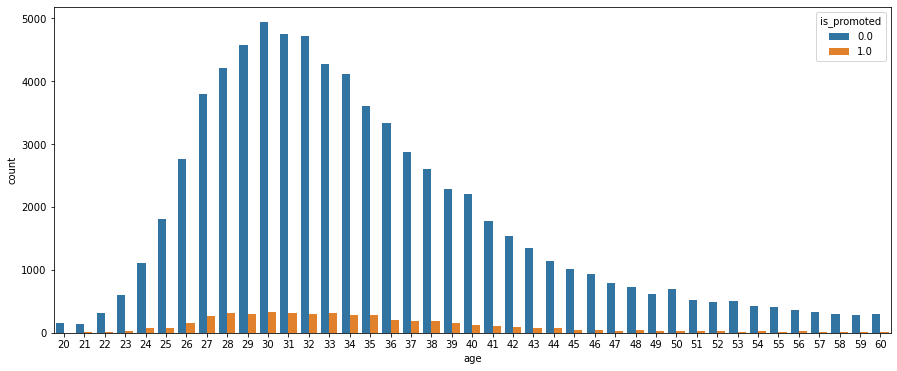

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(dataset['age'],hue=dataset['is_promoted'])

# Encoding categorical data

In [38]:
dataset_cat

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,5.000000,1,0,0.0
1,Operations,region_22,Bachelor's,m,other,5.000000,0,0,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.000000,0,0,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,1.000000,0,0,0.0
4,Technology,region_26,Bachelor's,m,other,3.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,3.000000,0,0,0.0
23486,Technology,region_25,Bachelor's,m,sourcing,3.000000,0,0,0.0
23487,HR,region_16,Bachelor's,f,sourcing,4.000000,0,0,0.0
23488,Procurement,region_31,Bachelor's,m,sourcing,3.332219,0,0,0.0


In [39]:
for col in dataset_cat.columns:
    print(col,":",dataset_cat[col].unique())

department : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region : ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education : ["Master's & above" "Bachelor's" 'Below Secondary']
gender : ['f' 'm']
recruitment_channel : ['sourcing' 'other' 'referred']
previous_year_rating : [5.         3.         1.         4.         3.33221857 2.        ]
KPIs_met >80% : [1 0]
awards_won? : [0 1]
is_promoted : [0. 1.]


In [40]:
ordinal=[]

In [41]:
nominal_data=dataset_cat

In [42]:
nominal_data=nominal_data.drop(["education","region","department"],axis=1)

In [43]:
ordinal_data=dataset_cat[["education"]]

In [44]:
ordinal_data

,education
0,Master's & above
1,Bachelor's
2,Bachelor's
3,Bachelor's
4,Bachelor's
...,...
23485,Below Secondary
23486,Bachelor's
23487,Bachelor's
23488,Bachelor's


In [45]:
ordinal_map={"education":{"Master's & above":1,"Bachelor's":2,"nan":3,"Below Secondary":4}}

In [46]:
ordinal_data["education"]=ordinal_data["education"].map(ordinal_map["education"])

<ipython-input-46-30cbda4feb91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_data["education"]=ordinal_data["education"].map(ordinal_map["education"])


In [47]:
nominal_data=pd.get_dummies(nominal_data, drop_first=True)

In [48]:
nominal_data[["previous_year_rating","KPIs_met >80%","awards_won?","gender_m","recruitment_channel_referred","recruitment_channel_sourcing","is_promoted"]]

,previous_year_rating,KPIs_met >80%,awards_won?,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,5.000000,1,0,0,0,1,0.0
1,5.000000,0,0,1,0,0,0.0
2,3.000000,0,0,1,0,1,0.0
3,1.000000,0,0,1,0,0,0.0
4,3.000000,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...
23485,3.000000,0,0,1,0,1,0.0
23486,3.000000,0,0,1,0,1,0.0
23487,4.000000,0,0,0,0,1,0.0
23488,3.332219,0,0,1,0,1,0.0


In [49]:
dataset_cat=pd.concat([nominal_data,ordinal_data],axis=1)

In [50]:
dataset_cat


,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,education
0,5.000000,1,0,0.0,0,0,1,1
1,5.000000,0,0,0.0,1,0,0,2
2,3.000000,0,0,0.0,1,0,1,2
3,1.000000,0,0,0.0,1,0,0,2
4,3.000000,0,0,0.0,1,0,0,2
...,...,...,...,...,...,...,...,...
23485,3.000000,0,0,0.0,1,0,1,4
23486,3.000000,0,0,0.0,1,0,1,2
23487,4.000000,0,0,0.0,0,0,1,2
23488,3.332219,0,0,0.0,1,0,1,2


In [51]:
region_dict=dataset["region"].value_counts().to_dict()

In [52]:
dataset["region"]=dataset["region"].replace(region_dict)

In [53]:
dict=dataset["department"].value_counts().to_dict()

In [54]:
dataset["department"]=dataset["department"].replace(dict)

In [55]:
dataset_cat

,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,education
0,5.000000,1,0,0.0,0,0,1,1
1,5.000000,0,0,0.0,1,0,0,2
2,3.000000,0,0,0.0,1,0,1,2
3,1.000000,0,0,0.0,1,0,0,2
4,3.000000,0,0,0.0,1,0,0,2
...,...,...,...,...,...,...,...,...
23485,3.000000,0,0,0.0,1,0,1,4
23486,3.000000,0,0,0.0,1,0,1,2
23487,4.000000,0,0,0.0,0,0,1,2
23488,3.332219,0,0,0.0,1,0,1,2


In [56]:
data=pd.concat([dataset_cat,dataset_num],axis=1)

In [57]:
data=data[["previous_year_rating","KPIs_met >80%","awards_won?","gender_m","recruitment_channel_referred","recruitment_channel_sourcing",
"education","no_of_trainings","age","length_of_service","avg_training_score","is_promoted"]]

# Splitting the data 

In [58]:
data

,previous_year_rating,KPIs_met >80%,awards_won?,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,education,no_of_trainings,age,length_of_service,avg_training_score,is_promoted
0,5.000000,1,0,0,0,1,1,1,35,8,49,0.0
1,5.000000,0,0,1,0,0,2,1,30,4,60,0.0
2,3.000000,0,0,1,0,1,2,1,34,7,50,0.0
3,1.000000,0,0,1,0,0,2,2,39,10,50,0.0
4,3.000000,0,0,1,0,0,2,1,45,2,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3.000000,0,0,1,0,1,4,1,24,1,61,0.0
23486,3.000000,0,0,1,0,1,2,1,31,7,74,0.0
23487,4.000000,0,0,0,0,1,2,1,26,4,50,0.0
23488,3.332219,0,0,1,0,1,2,3,27,1,70,0.0


In [59]:
x=data.iloc[:,0:12].values

In [60]:
y=data.iloc[:,11]

In [61]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23485    0.0
23486    0.0
23487    0.0
23488    0.0
23489    0.0
Name: is_promoted, Length: 78298, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Handle imbalanced data

In [64]:
from imblearn.under_sampling import RandomUnderSampler

In [65]:
rus= RandomUnderSampler()

In [66]:
x_rus,y_rus=rus.fit_resample(x_train,y_train)

# Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()

In [69]:
x_train=sc.fit_transform(x_rus)

In [70]:
x_test=sc.transform(x_test)

In [71]:
x_test.shape

(15660, 12)

# Building a model

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
gbm=GradientBoostingClassifier(n_estimators=10)
gbm.fit(x_rus,y_rus)
y_predgbm=gbm.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_predgbm))
f1_gbm=f1_score(y_test,y_predgbm)
print("f1_score:",f1_gbm)

accuracy_score: 1.0
f1_score: 1.0


In [73]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_rus,y_rus)
y_preddt=dt.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_preddt))
f1_dt=f1_score(y_test,y_preddt)
print("f1_score:",f1_dt)

accuracy_score: 1.0
f1_score: 1.0


In [93]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_rus,y_rus)
y_predrf=rf.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_predrf))
f1_rf=f1_score(y_test,y_predrf)
print("f1_score:",f1_rf)

accuracy_score: 1.0
f1_score: 1.0


In [74]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(n_estimators=10)
adb.fit(x_rus,y_rus)
y_predadb=adb.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_predadb))
f1_adb=f1_score(y_test,y_predadb)
print("f1_score:",f1_adb)

accuracy_score: 1.0
f1_score: 1.0


In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=1)
knn.fit(x_rus,y_rus)
y_predknn=knn.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_predknn))
f1_knn=f1_score(y_test,y_predknn)
print("f1_score:",f1_knn)

accuracy_score: 0.9438058748403576
f1_score: 0.081419624217119


In [76]:
from sklearn.naive_bayes import GaussianNB
Classifier_nb=GaussianNB()
Classifier_nb.fit(x_rus,y_rus)
y_predgnb=Classifier_nb.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_predgnb))
f1_gnb=f1_score(y_test,y_predgnb)
print("f1_score:",f1_gnb)

accuracy_score: 1.0
f1_score: 1.0


In [77]:

from sklearn.svm import SVC
sv=SVC(kernel="linear")
sv.fit(x_rus,y_rus)
y_predsvc=sv.predict(x_test)

print("accuracy_score:",accuracy_score(y_test,y_predknn))
f1_svc=f1_score(y_test,y_predsvc)
print("f1_score:",f1_svc)

accuracy_score: 0.9438058748403576
f1_score: 1.0


In [78]:
from xgboost import XGBClassifier
xg= XGBClassifier(n_estimators=10)
xg.fit(x_rus,y_rus)
y_predxg=xg.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_predxg))
f1_xgb=f1_score(y_test,y_predxg)
print("f1_score:",f1_xgb)

accuracy_score: 1.0
f1_score: 1.0


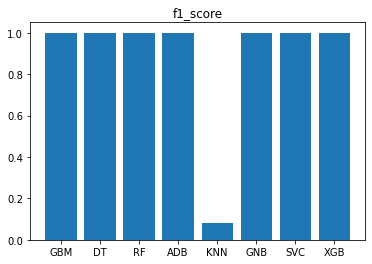

In [94]:
x=["GBM","DT","RF","ADB","GBM","KNN","GNB","SVC","XGB"]
data=[f1_gbm,f1_dt,f1_rf,f1_adb,f1_gbm,f1_knn,f1_gnb,f1_svc,f1_xgb]
plt.bar(x,data)
plt.title("f1_score")
plt.show()

# Real time Prediction

In [80]:
emp_data=[0,0,0,0,1,1,2,0,0,0,20,30]

In [81]:
emp_data=np.array([emp_data])

In [82]:
emp_data

array([[ 0,  0,  0,  0,  1,  1,  2,  0,  0,  0, 20, 30]])

In [83]:
gbm.predict(emp_data)

array([1.])

# save the model

In [84]:
import joblib


In [85]:
joblib.dump(gbm,'hr_model')

['hr_model']